In [1]:
%load_ext autoreload
%autoreload 2

from data_setup import *
ds=data_setup()

from logic.analysis.analysis import AnalysisCharts

an=AnalysisCharts()

In [4]:
varmap=ds.make_dicts()['varmap']

In [5]:
[(varmap[c],c) for c in varmap if 'diabetic' in varmap[c]]

[('ever_had_any_cause_of_nerve_damageneuropathy_other_than_diabetic_neuropathy_f120008_0_0',
  'f.120008.0.0'),
 ('ever_had_diabetic_neuropathy_f120079_0_0', 'f.120079.0.0'),
 ('date_e15_first_reported_nondiabetic_hypoglycaemic_coma_f130716_0_0',
  'f.130716.0.0'),
 ('source_of_report_of_e15_nondiabetic_hypoglycaemic_coma_f130717_0_0',
  'f.130717.0.0')]

In [6]:
icd10_diabs_type1=ds.search_icd(strings='diabetes',second_string='insulin',
                                non_strings='family|screening|noninsulin|insipidus|pregnancy',string_pat=True)[0]
icd10_diabs_type2=ds.search_icd(strings='diabetes',second_string='noninsulin',
                                non_strings='family|screening|insipidus|pregnancy',string_pat=True)[0]

In [90]:
df_diab_t1=dp.data_merge_dis(remwords='xxxxx',disease='diabetes_t1',icd10s=icd10_diabs_type1,outfile=None,use_icd10=True,
                 strcont=True,bef=False,years=0)[['eid','diabetes_t1','time_to_diabetes_t1']]

0
Total ohe variables = 1 


In [95]:
df_diab_t1=dp.disease_labels_ICD10s2(icd10s=icd10_diabs_type1,disease='diabetes_t1',out='test.parquet',strcont=True,bef=False,
		years=2,outfile=False)

In [99]:
df_diab_t1[0]['diabetes_t1_date'].max()

Timestamp('2021-09-26 00:00:00')

In [100]:
df_dis_date_test=pd.read_parquet(dp.path+'df_dis_date_test2.parquet')

In [103]:
df_dis_date_test['disease_date'].max()

Timestamp('2021-09-30 00:00:00')

In [96]:
df_diab_t1['time_to_diabetes_t1'].hist()

TypeError: tuple indices must be integers or slices, not str

In [49]:
cols=['eid','diabetes_diagnosed_by_doctor_f2443_0_0','ever_had_diabetic_neuropathy_f120079_0_0']
df=ds.make_parquet(cols=cols,outfile='df_diabpoly',parq_out=True)
df['eid']=df['eid'].astype(str)

In [54]:
df_model=pd.read_parquet(dp.path+'df_model_test.parquet')

In [70]:
df_model['eid']=df_model['eid'].astype(str)

In [56]:
df_diabpoly=pd.read_parquet('../../data/df_diabpoly.parquet')

In [59]:
df_diabpoly['eid']=df_diabpoly['eid'].astype(str)

In [66]:
diab_eids=list(df_diabpoly.loc[df_diabpoly['diabetes_diagnosed_by_doctor_f2443_0_0']==1,'eid'].astype(str))
diab_poly_eids=list(df_diabpoly.loc[df_diabpoly['ever_had_diabetic_neuropathy_f120079_0_0']==1,'eid'].astype(str))

In [71]:
df_diab2=df_model.loc[df_model['eid'].isin(diab_eids),]
mask=(df_diab2['eid'].isin(diab_poly_eids))
df_diab2['polyneuropathy']=0
df_diab2.loc[mask,'polyneuropathy']=1

In [77]:
df_diab2['polyneuropathy'].sum()
df_diab2['NLR']=df_diab2['neutrophill_count_f30140_0_0']/df_diab2['lymphocyte_count_f30120_0_0']

Total polyneuropathy in data: 941
Total polyneuropathy in data: 941
3


<Figure size 2000x3000 with 0 Axes>

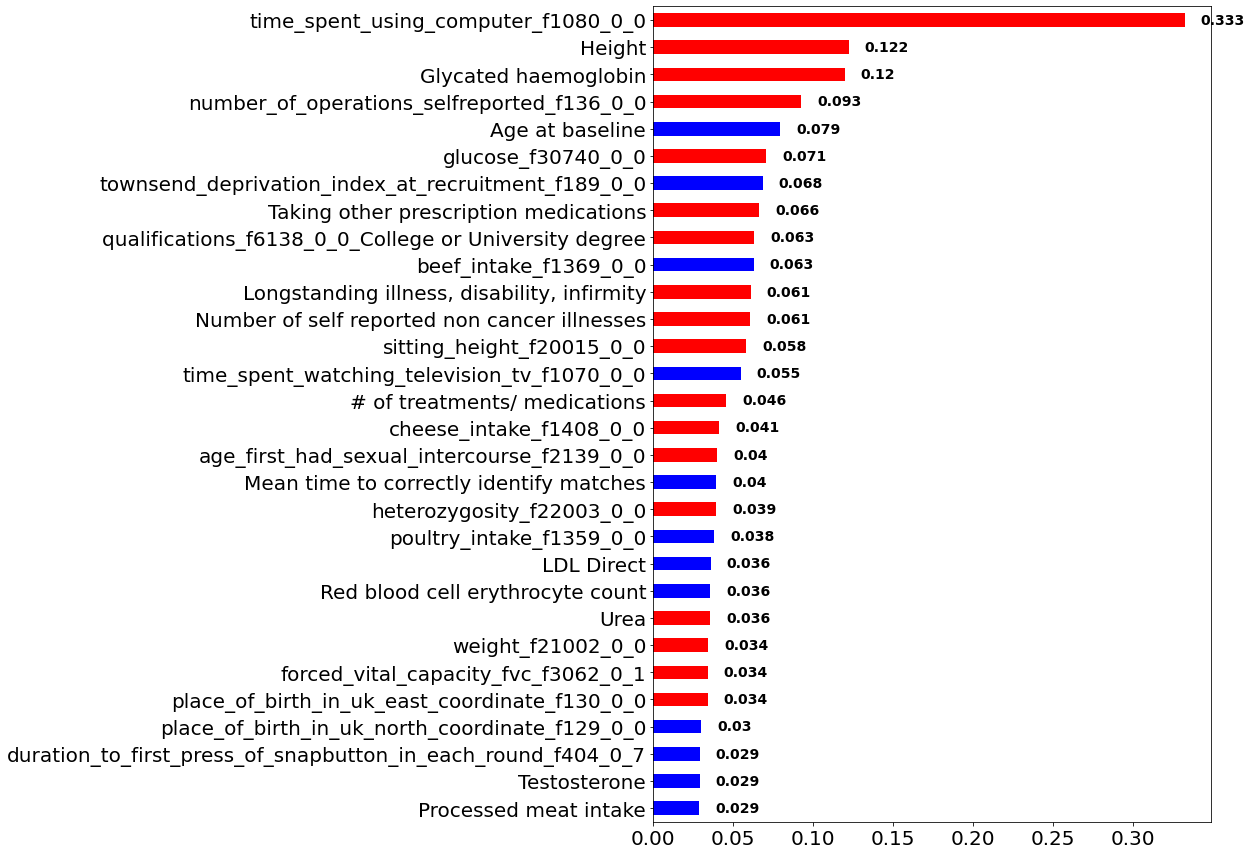

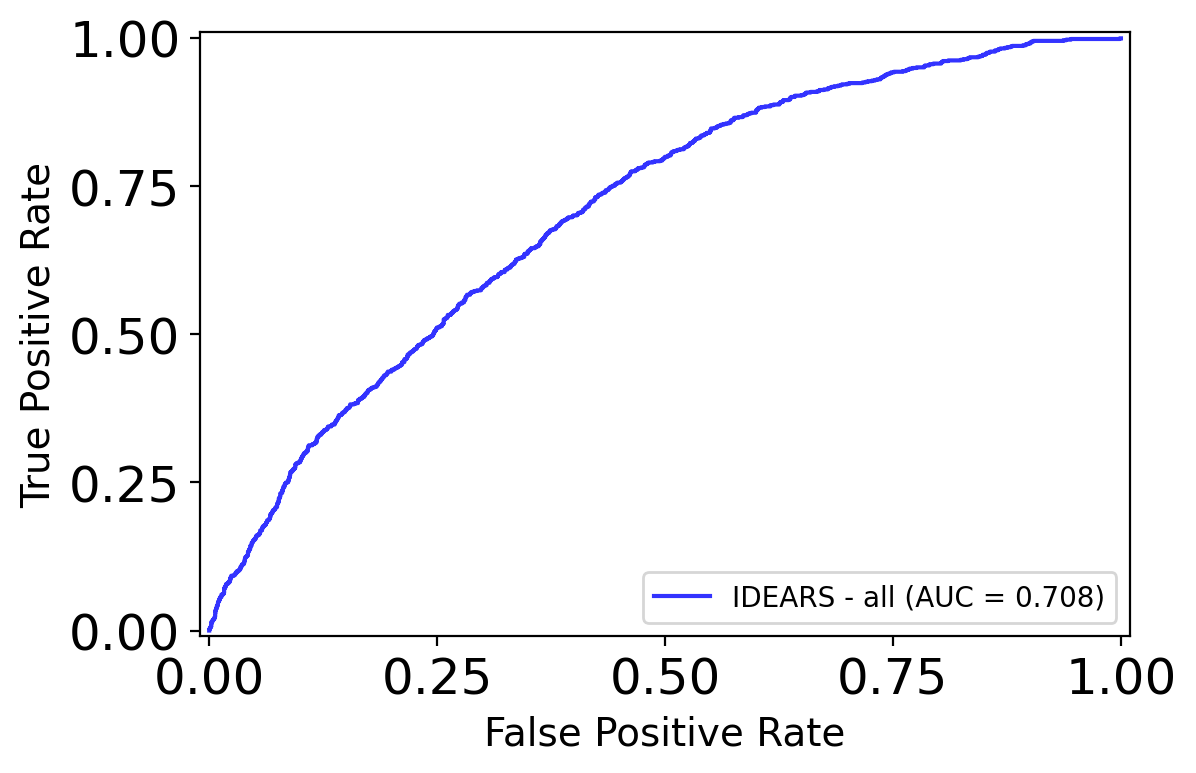

[0.7083026256224536]

In [74]:
shap_poly_diab=ds.process_run(df=df_diab2,depvar='polyneuropathy',resize=1,resizeratio=5,remwords='diabetes|H360|total_dis')
feats_all=ml.shapgraphs_tuple(shap_poly_diab,max_disp=30,figname='SHAP IDEARS ENTIRE COHORT polyneuro no pain in diabetes v2')
ml.ROCAUC_tuples(df_out_list=[shap_poly_diab[2]],labels=['IDEARS - all'],cols=['blue'],figname='ROCAUC polyneuro no pain in diabetes v2')

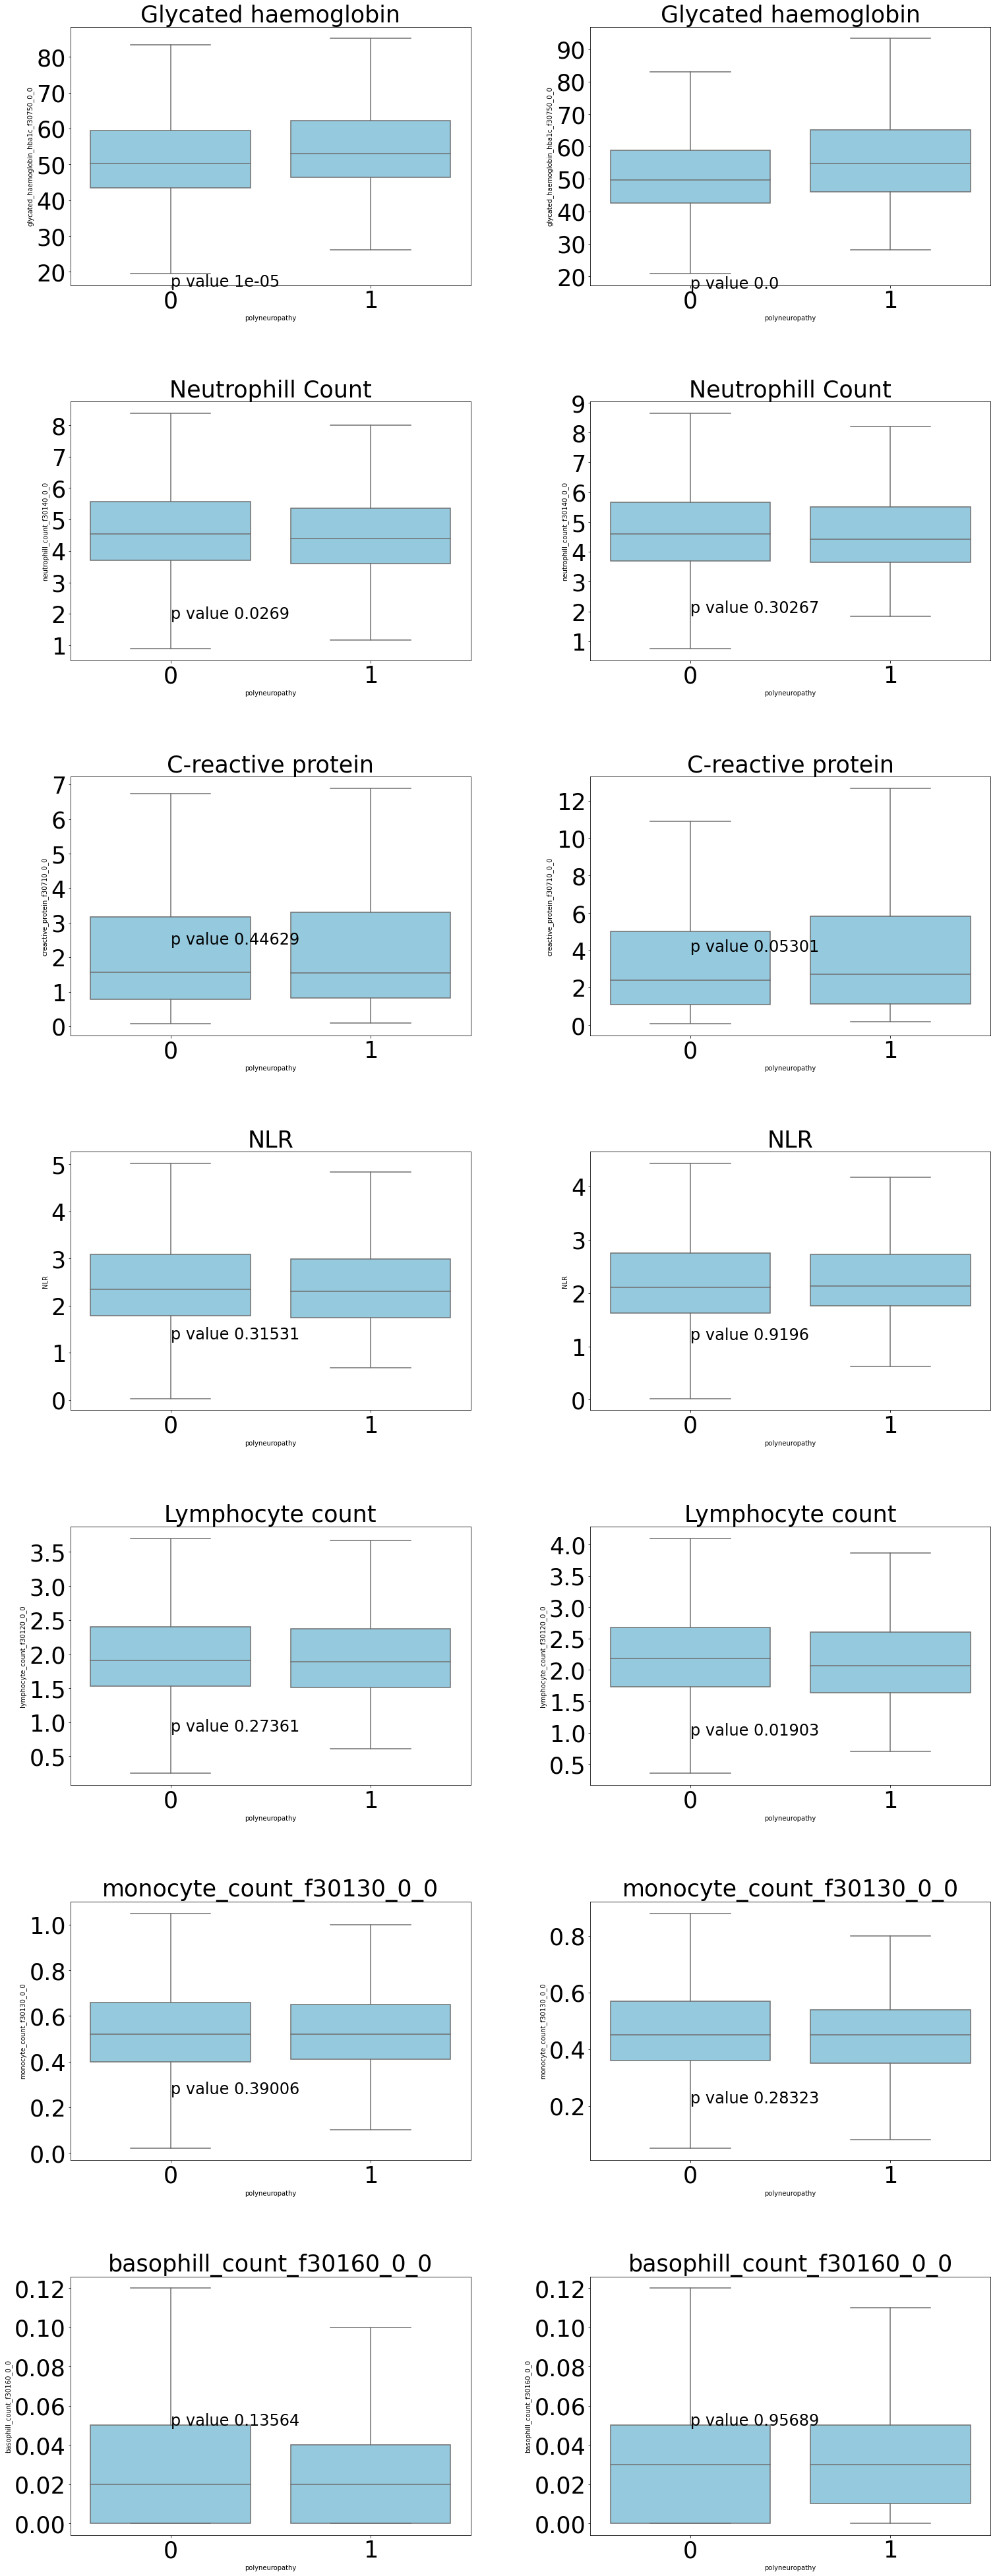

In [78]:
ds.runplots_static(df=df_diab2,depvar='polyneuropathy',fig_name='diabetes_inflamm_polydiab')

In [6]:
df_diab=ds.basic_diab_df()

0
Total ohe variables = 1 


In [7]:
df_poly_pros=ds.basic_df_poly(bef=False,years=2,var_time='time_to_diab_poly')

0
Total ohe variables = 1 


In [9]:
poly_eids=list(df_poly_pros.loc[df_poly_pros['diab_poly']==1,'eid'].astype(str))

In [79]:
len(poly_eids)

1133

In [82]:
mask=(df_diab2['eid'].isin(diab_poly_eids))

df_diab3=df_diab2.loc[~mask,]

mask=(df_diab2['eid'].isin(poly_eids))
df_diab2['polyneuropathy']=0
df_diab2.loc[mask,'polyneuropathy']=1

Total polyneuropathy in data: 823
Total polyneuropathy in data: 823
3


<Figure size 2000x3000 with 0 Axes>

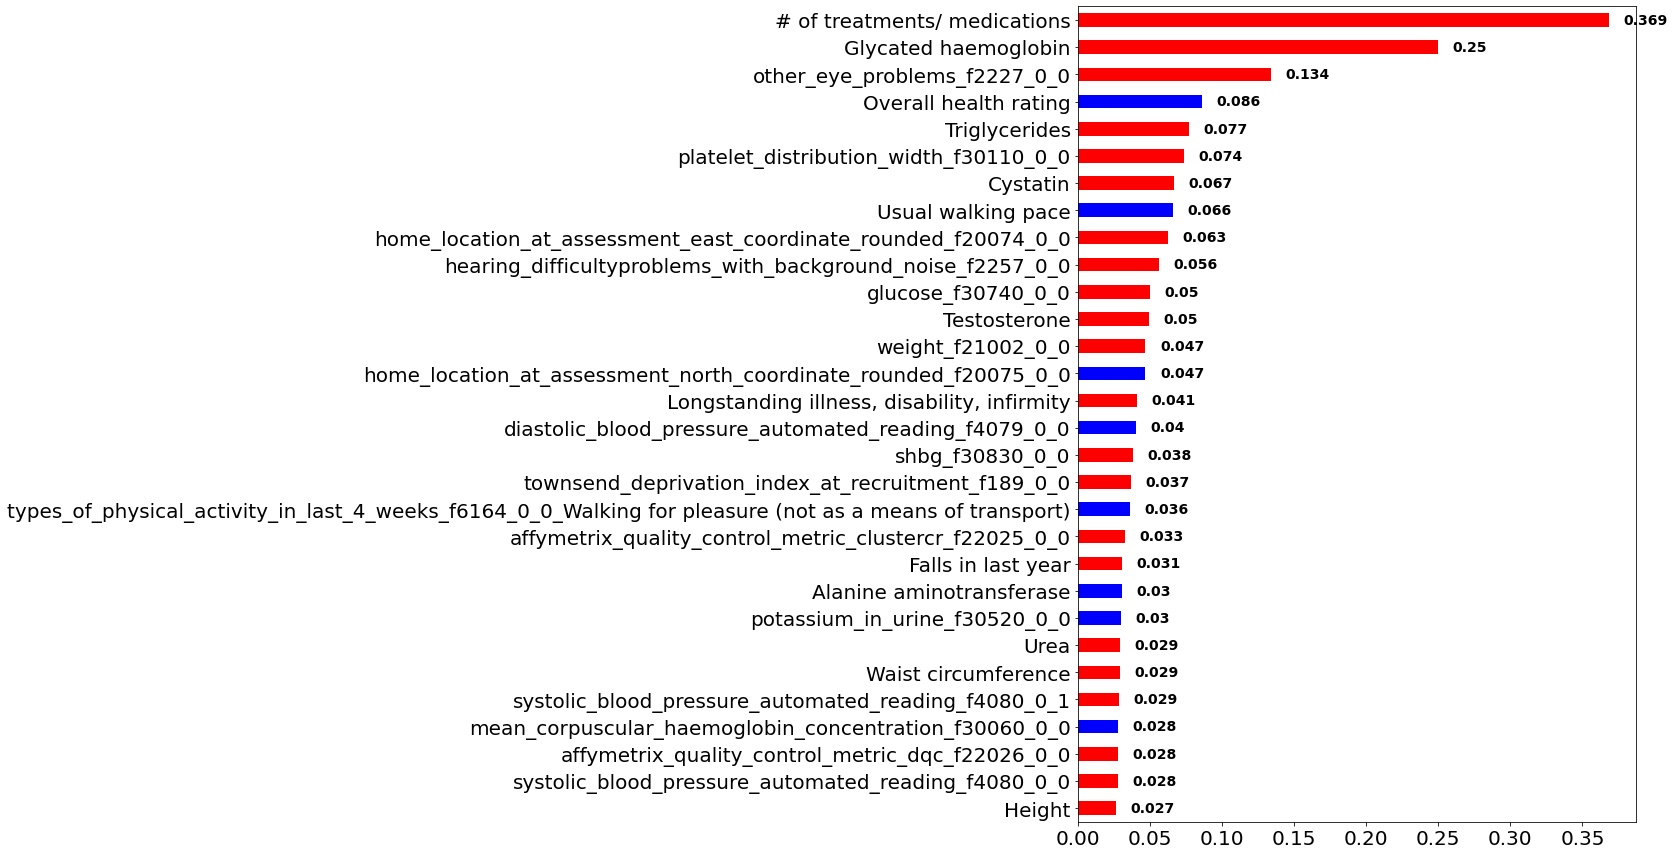

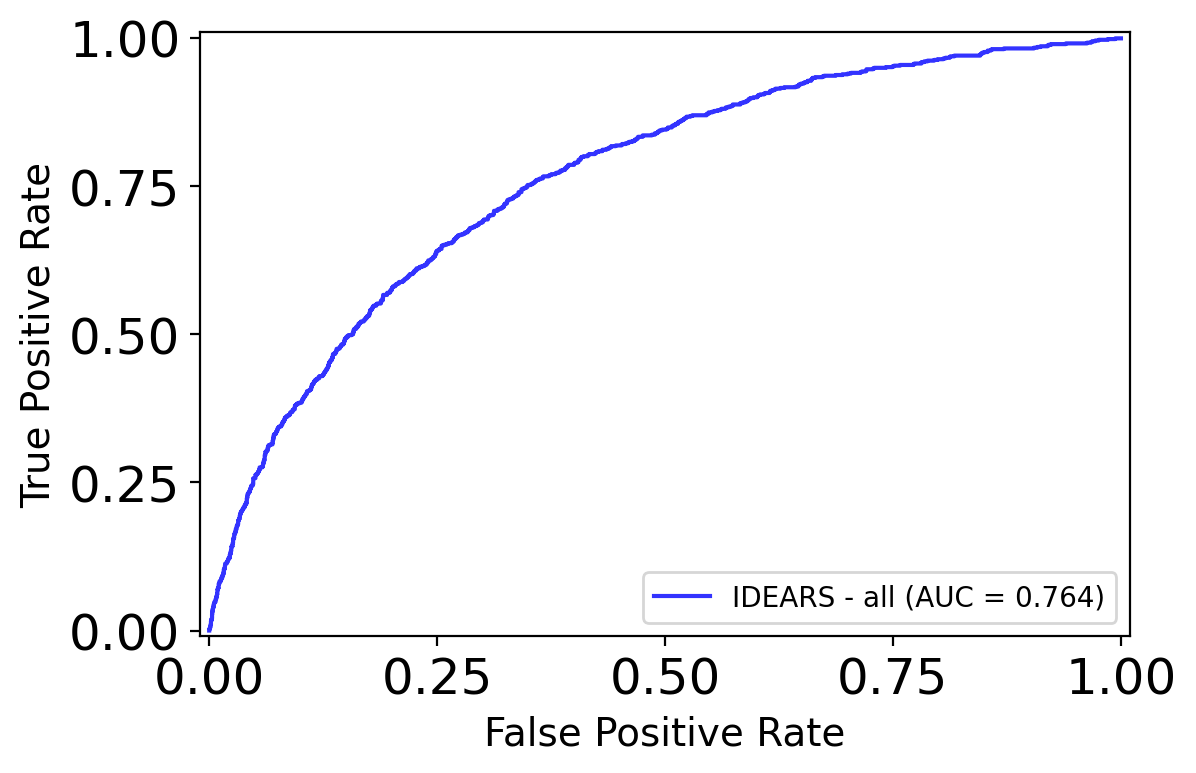

[0.7643130243189745]

In [84]:
shap_poly_diab=ds.process_run(df=df_diab3,depvar='polyneuropathy',resize=1,resizeratio=5,remwords='diabetes|H360|total_dis')
feats_all=ml.shapgraphs_tuple(shap_poly_diab,max_disp=30,figname='SHAP IDEARS ENTIRE COHORT polyneuro no pain in diabetes v2')
ml.ROCAUC_tuples(df_out_list=[shap_poly_diab[2]],labels=['IDEARS - all'],cols=['blue'],figname='ROCAUC polyneuro no pain in diabetes v2')

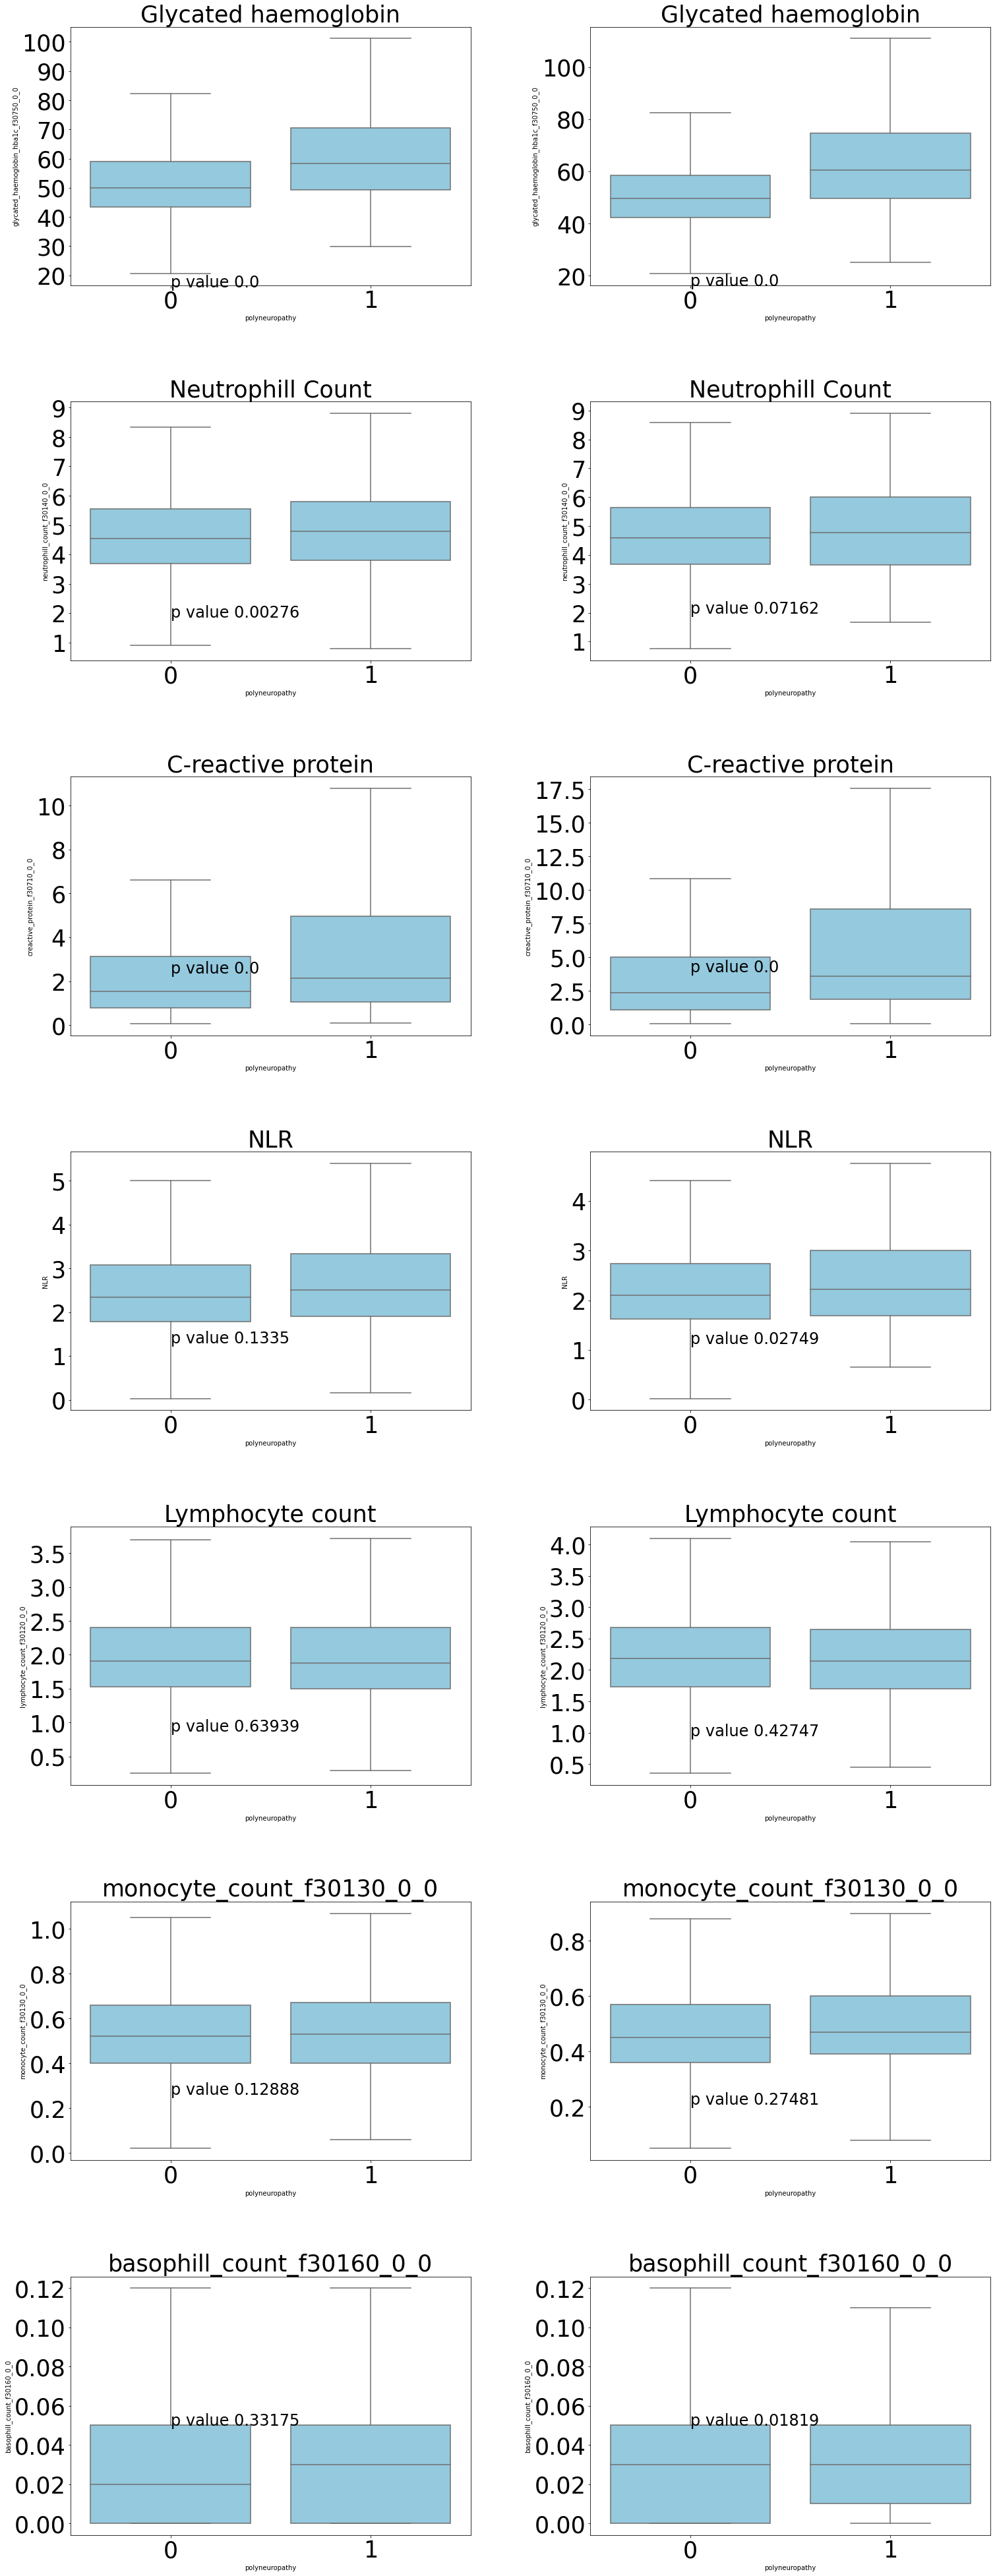

In [85]:
ds.runplots_static(df=df_diab3,depvar='polyneuropathy',fig_name='diabetes_inflamm_polydiab')

In [11]:
df_diab['polyneuropathy']=0
df_diab.loc[df_diab['eid'].isin(poly_eids),'polyneuropathy']=1

In [12]:
df_diab['polyneuropathy'].sum()

646

In [14]:
dp.findcols(df_diab,'sex_')

['ever_had_samesex_intercourse_f2159_0_0',
 'sex_f31_0_0',
 'sex_inference_x_probeintensity_f22022_0_0',
 'sex_inference_y_probeintensity_f22023_0_0']

In [16]:
mask=(df_diab['sex_f31_0_0']==1)
df_diab_m=df_diab.loc[~mask,]
df_diab_f=df_diab.loc[mask,]

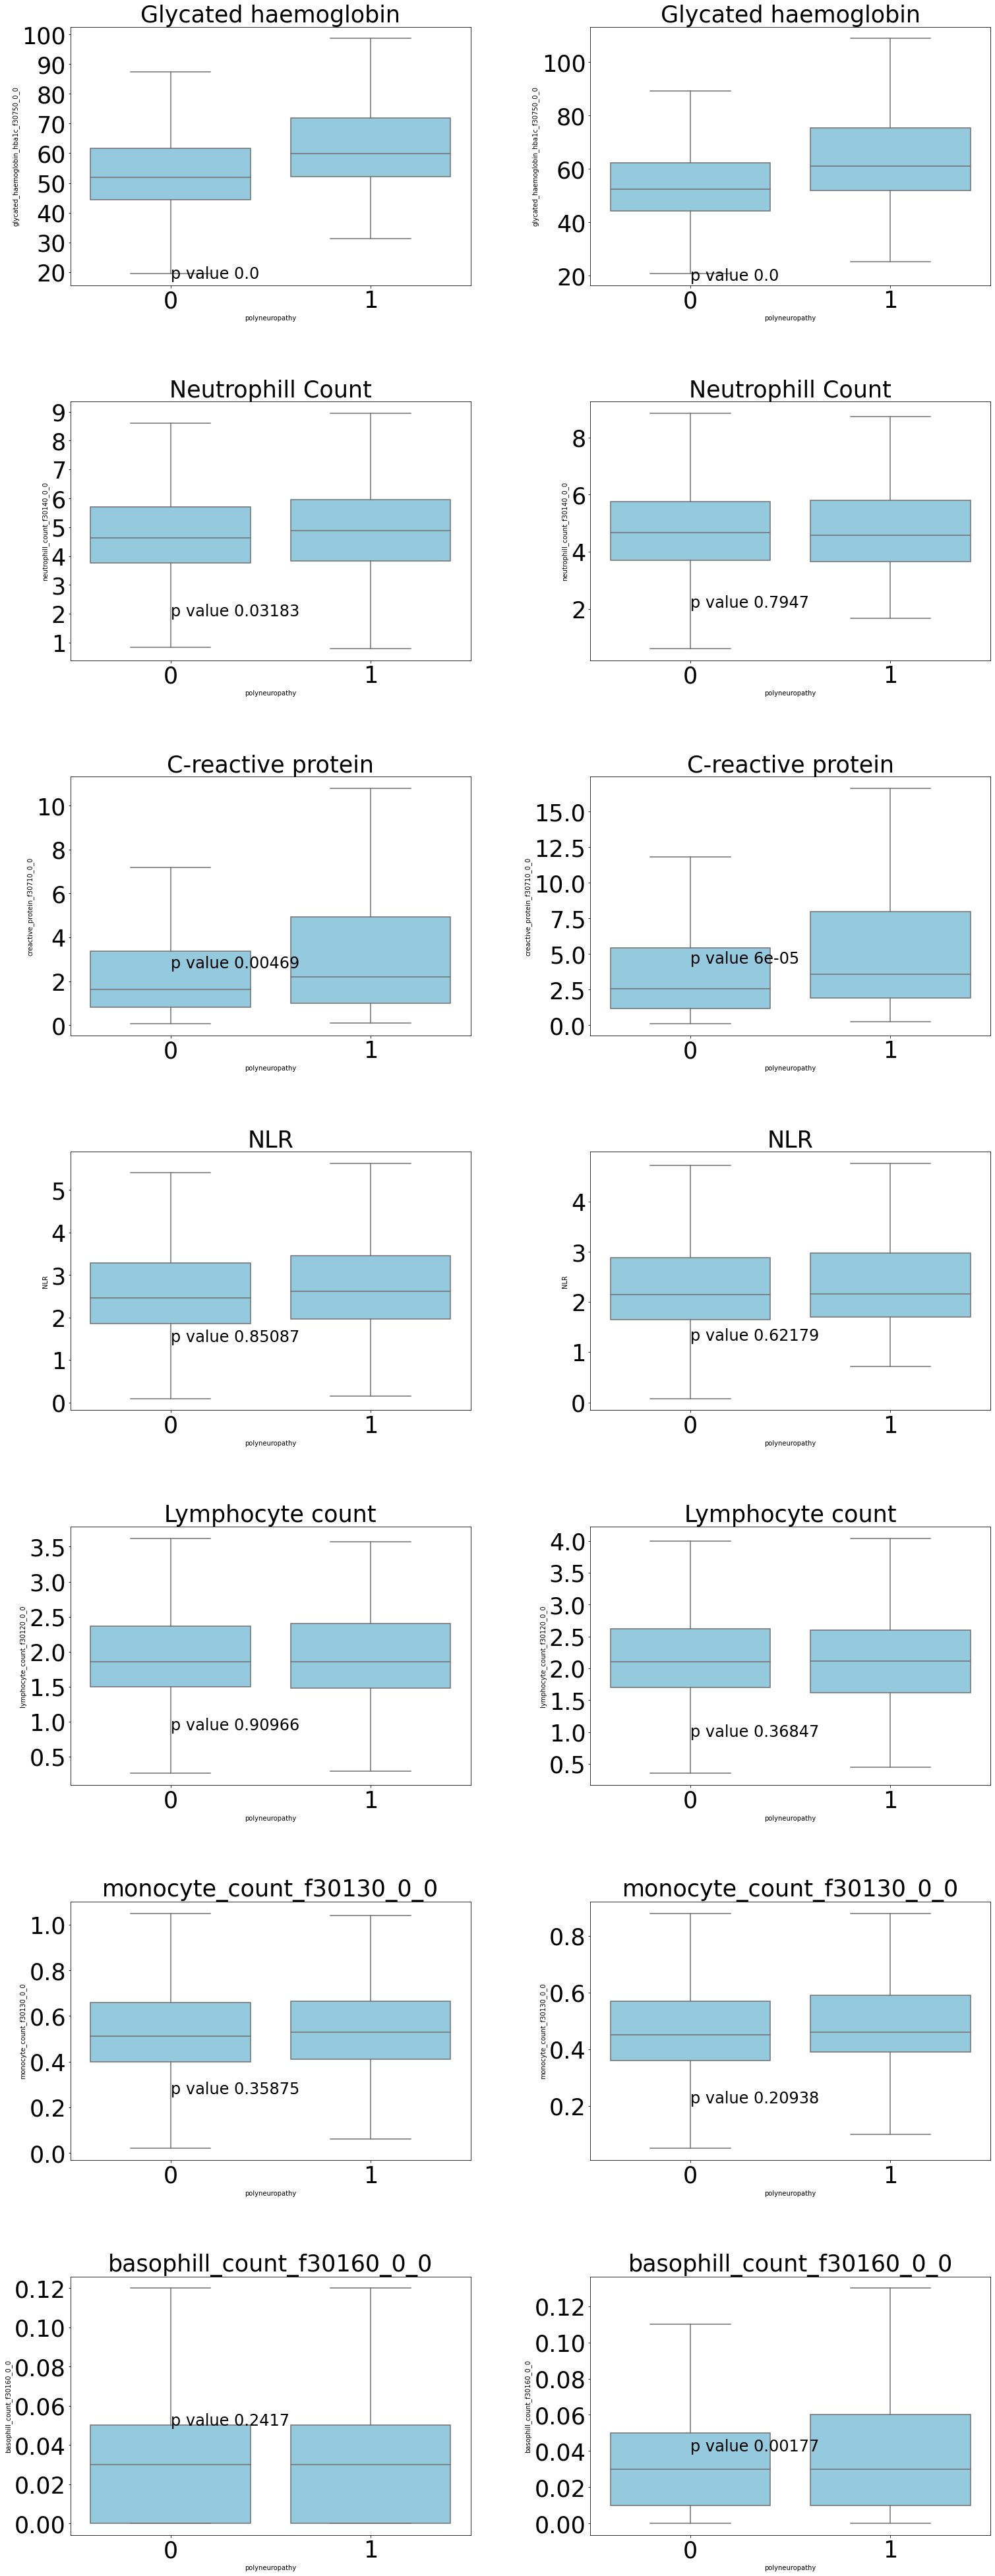

In [24]:
ds.runplots_static(df=df_diab,depvar='polyneuropathy',fig_name='diabetes_inflamm_polydiab')

Total polyneuropathy in data: 646
Total polyneuropathy in data: 646
3


<Figure size 2000x3000 with 0 Axes>

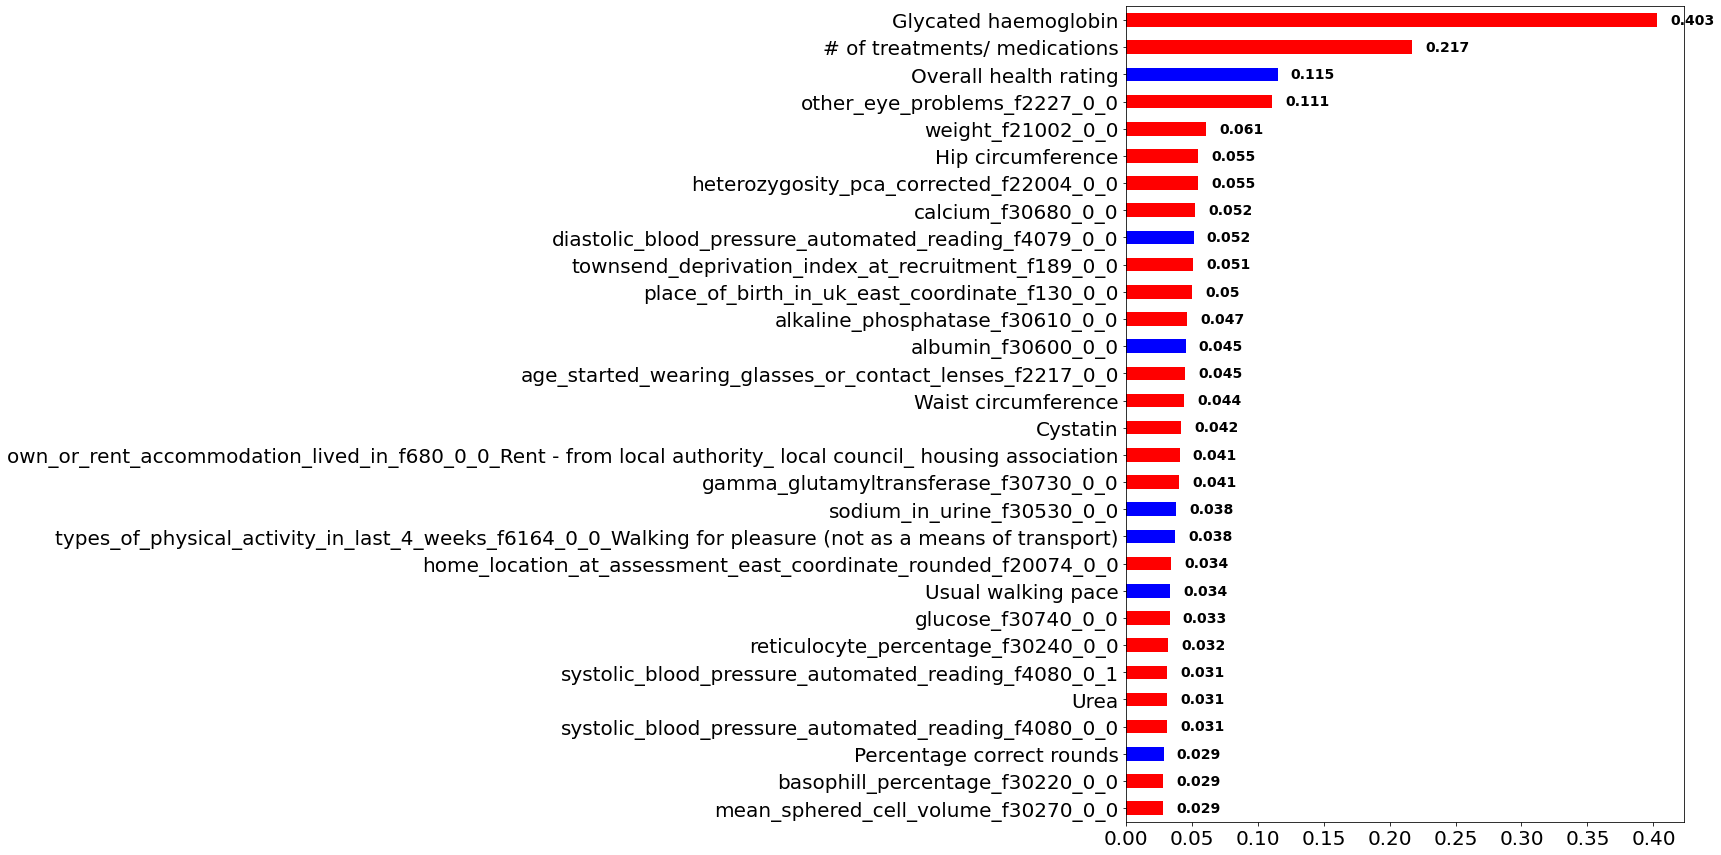

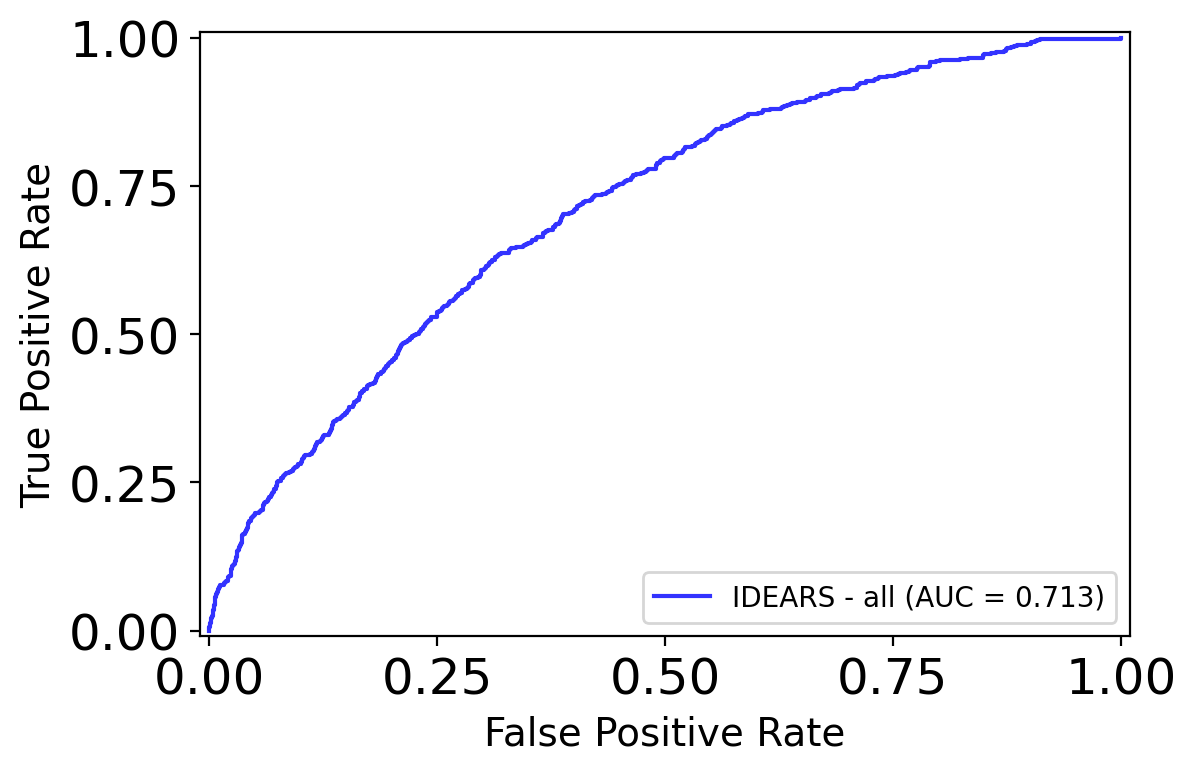

[0.7130107640253429]

In [13]:
shap_poly_diab=ds.process_run(df=df_diab,depvar='polyneuropathy',resize=1,resizeratio=5,remwords='diabetes|H360|total_dis')
feats_all=ml.shapgraphs_tuple(shap_poly_diab,max_disp=30,figname='SHAP IDEARS ENTIRE COHORT polyneuro no pain in diabetes v2')
ml.ROCAUC_tuples(df_out_list=[shap_poly_diab[2]],labels=['IDEARS - all'],cols=['blue'],figname='ROCAUC polyneuro no pain in diabetes v2')

Total polyneuropathy in data: 431
Total polyneuropathy in data: 431
3


<Figure size 2000x3000 with 0 Axes>

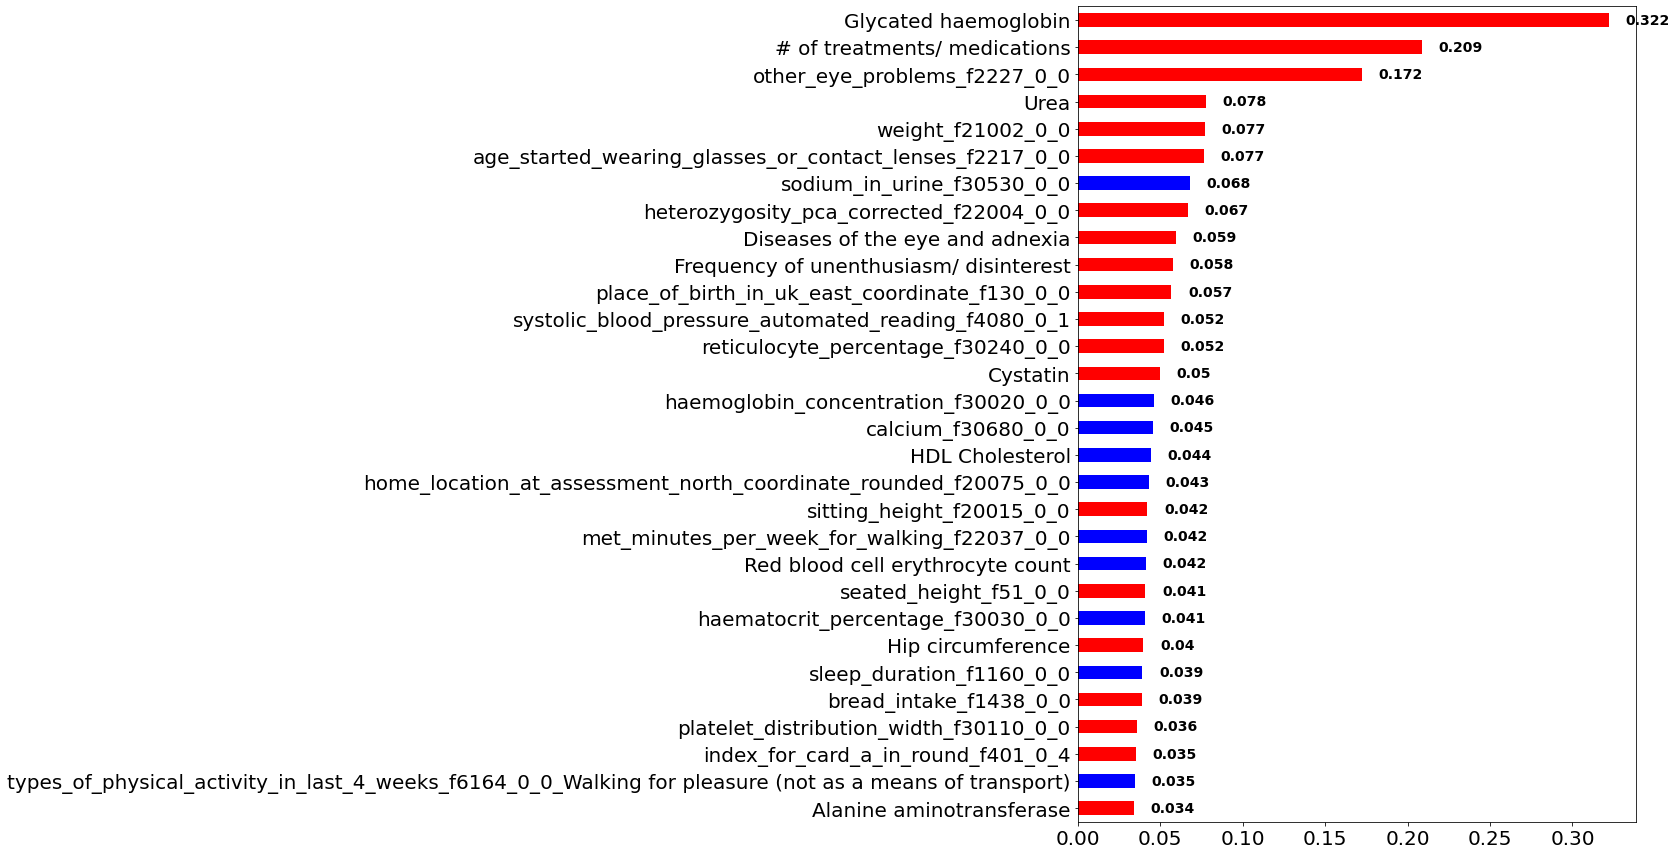

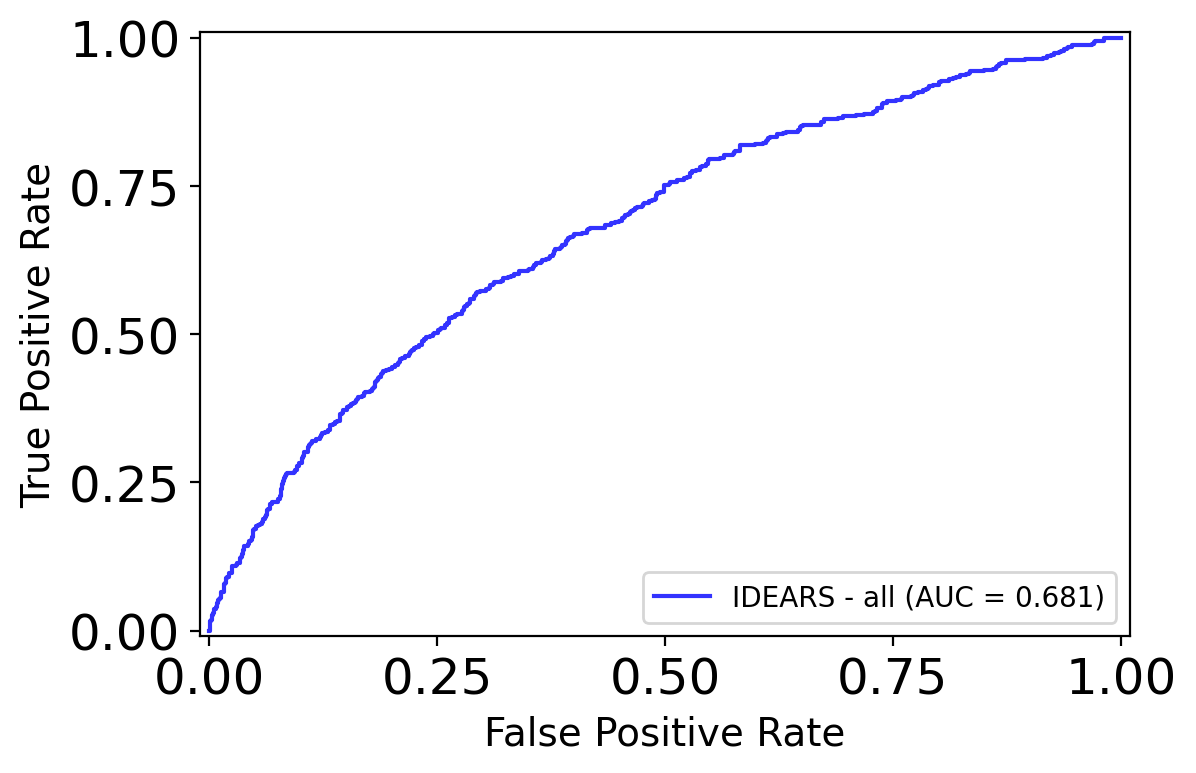

[0.6811449759945131]

In [17]:
shap_poly_diab=ds.process_run(df=df_diab_m,depvar='polyneuropathy',resize=1,resizeratio=5,remwords='diabetes|H360|total_dis')
feats_all=ml.shapgraphs_tuple(shap_poly_diab,max_disp=30,figname='SHAP IDEARS ENTIRE COHORT polyneuro no pain in diabetes v2 male')
ml.ROCAUC_tuples(df_out_list=[shap_poly_diab[2]],labels=['IDEARS - all'],cols=['blue'],figname='ROCAUC polyneuro no pain in diabetes v2 male')

Total polyneuropathy in data: 215
Total polyneuropathy in data: 215
3


<Figure size 2000x3000 with 0 Axes>

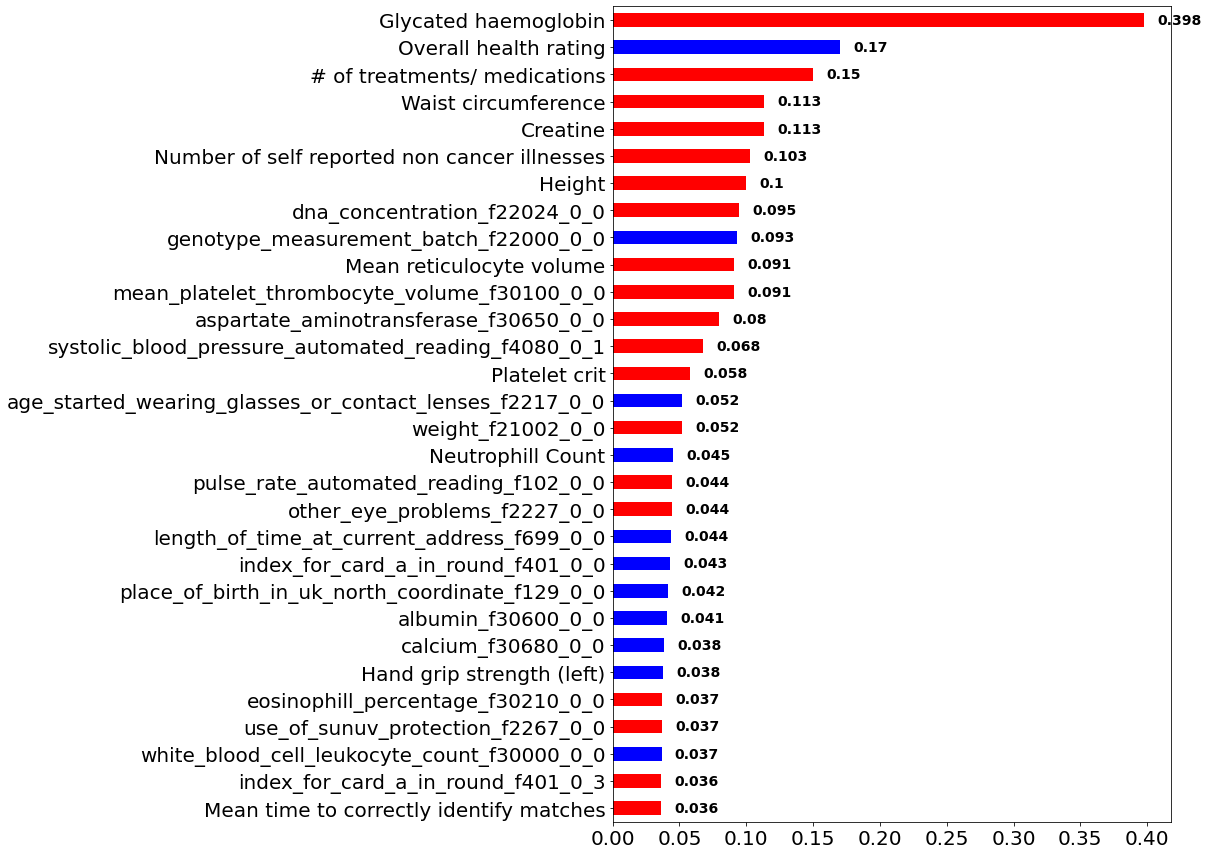

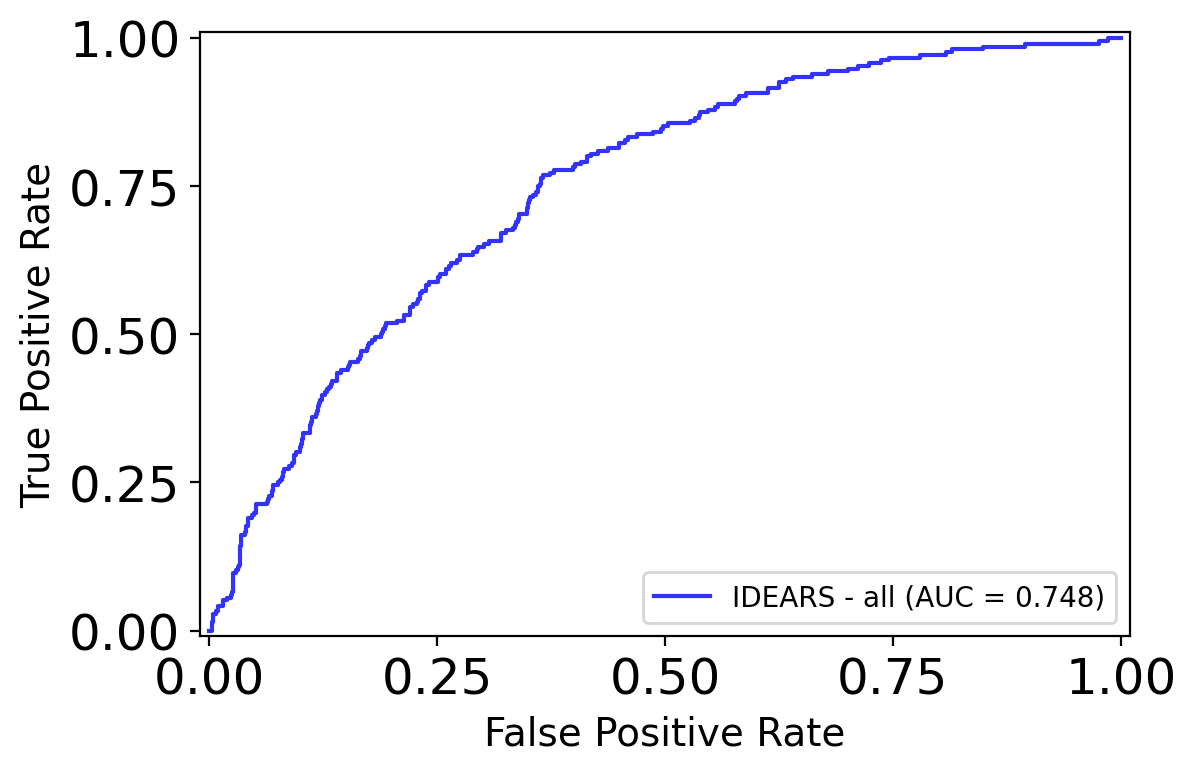

[0.7481395747599453]

In [18]:
shap_poly_diab=ds.process_run(df=df_diab_f,depvar='polyneuropathy',resize=1,resizeratio=5,remwords='diabetes|H360|total_dis')
feats_all=ml.shapgraphs_tuple(shap_poly_diab,max_disp=30,figname='SHAP IDEARS ENTIRE COHORT polyneuro no pain in diabetes v2 female')
ml.ROCAUC_tuples(df_out_list=[shap_poly_diab[2]],labels=['IDEARS - all'],cols=['blue'],figname='ROCAUC polyneuro no pain in diabetes v2 female')

In [2]:
df_diab_poly_base,df_diab=ds.diabetes_run()

0
Total ohe variables = 1 
0
Total ohe variables = 1 
0
Total ohe variables = 1 
recs prosp diab poly 1208
num diab poly 112


In [4]:
df_diab['polyneuropathy'].sum()

112

Total polyneuropathy in data: 112
Total polyneuropathy in data: 112
3


<Figure size 2000x3000 with 0 Axes>

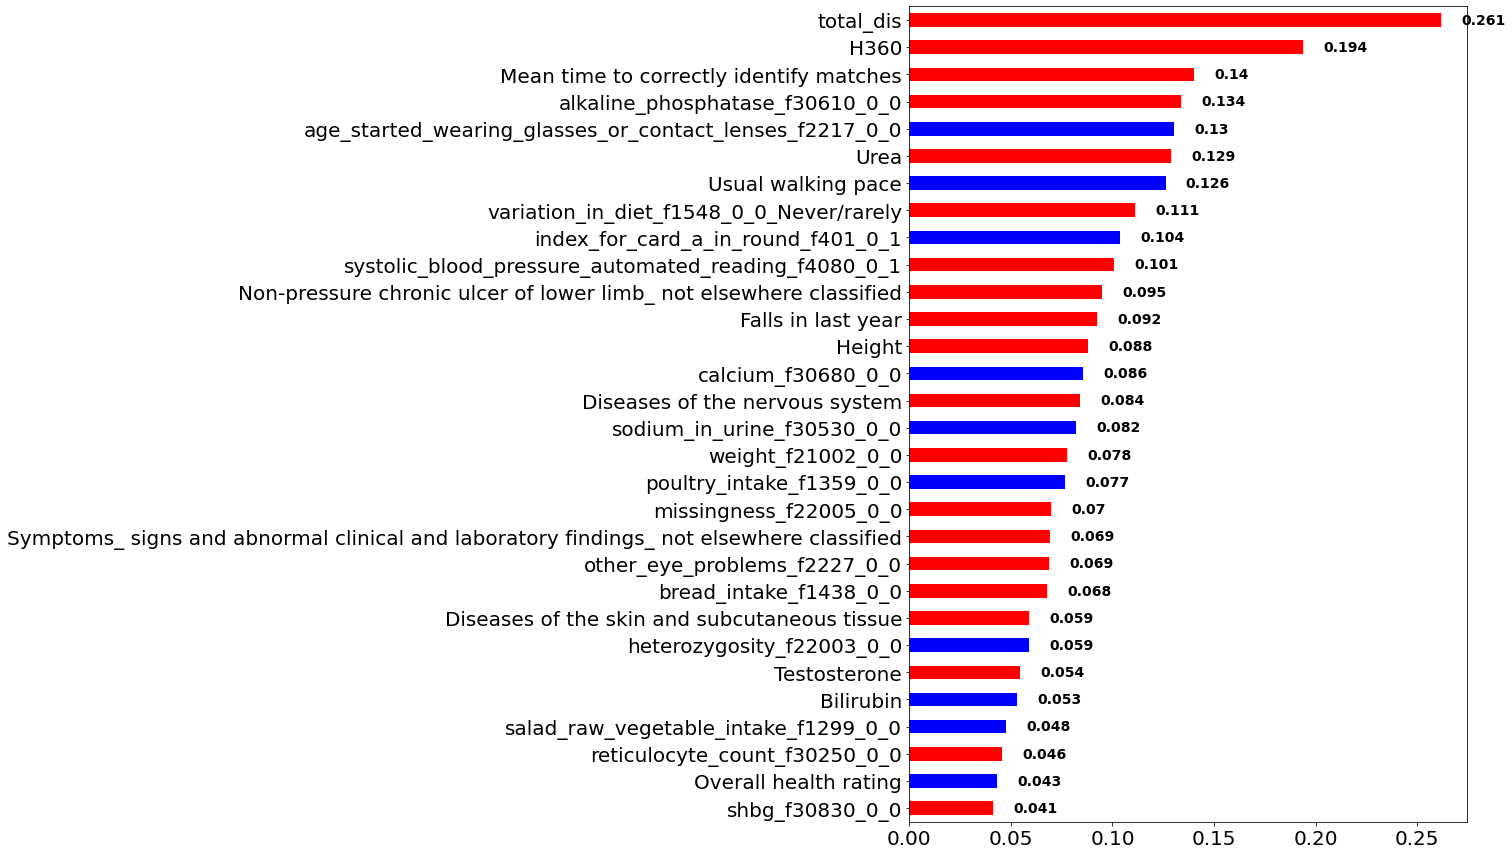

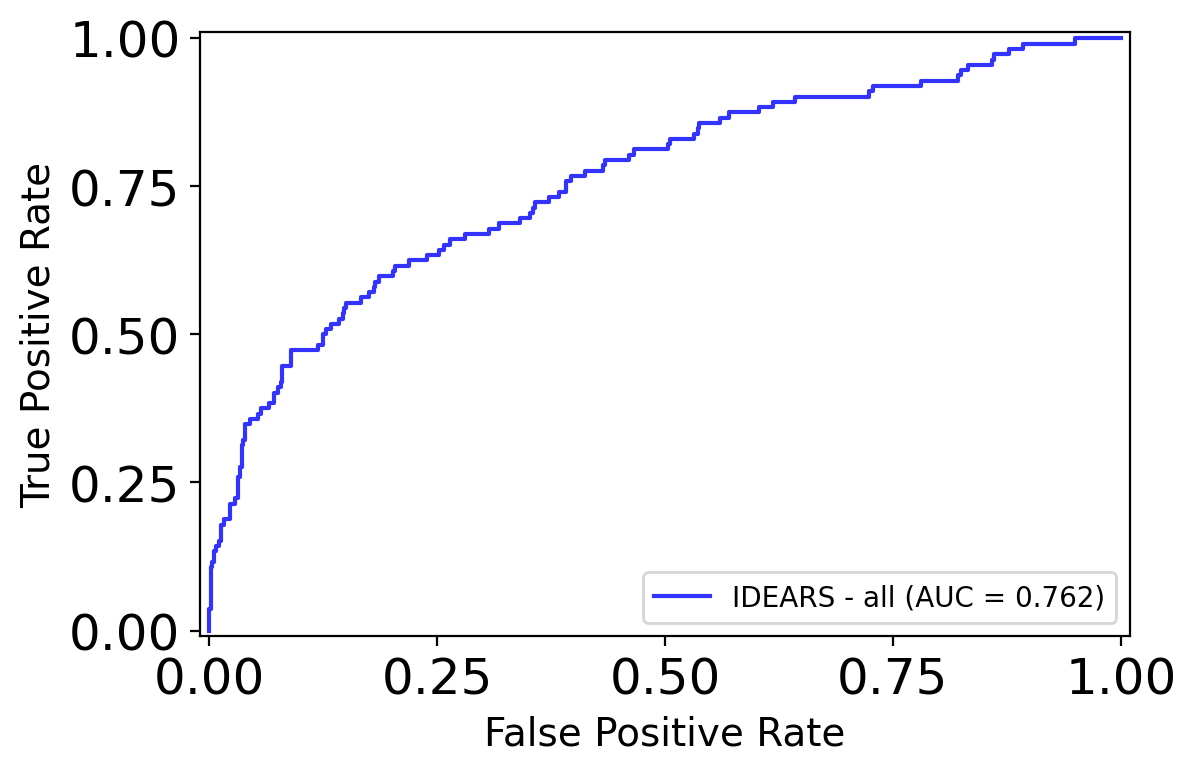

[0.7618144132653061]

In [3]:
shap_poly_diab=ds.process_run(df=df_diab,depvar='polyneuropathy',resize=1,resizeratio=5,remwords='diabetes')
feats_all=ml.shapgraphs_tuple(shap_poly_diab,max_disp=30,figname='SHAP IDEARS ENTIRE COHORT polyneuro no pain in diabetes v2')
ml.ROCAUC_tuples(df_out_list=[shap_poly_diab[2]],labels=['IDEARS - all'],cols=['blue'],figname='ROCAUC polyneuro no pain in diabetes v2')